In [1]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import os.path
from sklearn.feature_extraction.text import CountVectorizer
import pickle as pkl
from time import time
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import ParameterGrid
from random import sample
from matplotlib import pyplot as plt
from scipy import stats
import random

In [6]:
def loading_lda(num_topics,max_features,max_df,min_df):
    term_freq_df_path = 'LDA_matriix/tfVectorizer_topics={}_maxFeatures={}_maxDf={}_minDf={}.csv'.format(num_topics,max_features,max_df,min_df)
    
    if os.path.exists(term_freq_df_path):
        term_freq_df = pd.read_csv(term_freq_df_path)
    
        voc_list = list(term_freq_df.columns)
        all_idx = [i for i in range(len(voc_list))]
        food_idx = [idx for idx in range(len(voc_list)) if voc_list[idx] in food]
        activity_idx = [idx for idx in range(len(voc_list)) if voc_list[idx] in activity]
        irrelevant_idx = list(filter(lambda x: x not in food_idx + activity_idx,all_idx))
        empirical_food_ts_list = []
        empirical_activity_ts_list = []

        for i in range(num_topics):
            food_ts_list = []
            food_p_list = []
            activity_ts_list = []
            activity_p_list = []
            all_prob = term_freq_df.iloc[i,:]
            food_prob = all_prob[food_idx].tolist()
            activity_prob = all_prob[activity_idx].tolist()
            irrelevant_prob = all_prob[irrelevant_idx].tolist()
            food_ts,food_p = stats.ks_2samp(food_prob, irrelevant_prob)
            activity_ts,activity_p = stats.ks_2samp(activity_prob, irrelevant_prob)
            food_ts_list.append(food_ts)
            food_p_list.append(food_p)
            activity_ts_list.append(activity_ts)
            activity_p_list.append(activity_p)

            count = 20000
            while count != 0:
                count -= 1
                all_prob = np.random.permutation(all_prob)
                food_prob = all_prob[food_idx].tolist()
                activity_prob = all_prob[activity_idx].tolist()
                irrelevant_prob = all_prob[irrelevant_idx].tolist()
                food_ts,food_p = stats.ks_2samp(food_prob, irrelevant_prob)
                activity_ts,activity_p = stats.ks_2samp(activity_prob, irrelevant_prob)

                food_ts_list.append(food_ts)
                food_p_list.append(food_p)
                activity_ts_list.append(activity_ts)
                activity_p_list.append(activity_p)

            empirical_food_ts = len([i for i in food_ts_list[1:] if i > food_ts_list[0]])/20000
            empirical_activity_ts = len([i for i in activity_ts_list[1:] if i > activity_ts_list[0]])/20000
            empirical_food_ts_list.append(empirical_food_ts)
            empirical_activity_ts_list.append(empirical_activity_ts)
        return empirical_food_ts_list,empirical_activity_ts_list
    else:
        return 'No file found'


if __name__ == '__main__':
    food = list(pkl.load(open("food.pickle","rb")))
    food = [i.strip() for i in food]
    activity = list(pkl.load(open("activity.pickle","rb")))
    activity = [i.strip() for i in activity]
    
    print(loading_lda(50,12000,0.6,1))
    print(loading_lda(50,16000,0.6,1))
    print(loading_lda(125,20000,0.5,100))
    print(loading_lda(125,25000,0.5,100))
    print(loading_lda(75,12000,0.4,1))
    print(loading_lda(75,16000,0.4,1))
    print(loading_lda(100,12000,0.5,1))
    print(loading_lda(100,16000,0.5,1))


In [40]:
LDA50_12000 = ([0.0, 0.0013, 0.00095, 0.0001, 0.0018, 0.0003, 0.00095, 0.0014, 0.00265, 0.00045, 0.0238, 0.00015, 0.00045, 0.0009, 0.00035, 0.00035, 0.00015, 0.0015, 0.0007, 0.00015, 0.0003, 0.00025, 0.00025, 0.00125, 0.00045, 0.00345, 0.0016, 0.001, 0.0023, 0.01215, 0.00455, 0.00035, 0.0, 0.00285, 0.0004, 0.00015, 0.0003, 0.004, 0.0011, 0.0014, 0.0002, 0.00015, 0.00065, 0.00125, 0.0017, 0.00065, 0.00025, 0.00035, 0.0003, 0.0037], [0.0, 0.0025, 0.0004, 5e-05, 0.00205, 0.0002, 5e-05, 0.0001, 0.00015, 0.00015, 0.0, 0.00025, 0.00185, 0.0001, 0.0006, 0.0, 0.0016, 0.002, 0.0, 5e-05, 0.0001, 0.0002, 0.0004, 5e-05, 0.00015, 0.0003, 0.0004, 0.00015, 0.00055, 0.00025, 0.00025, 0.0001, 5e-05, 0.0, 0.00045, 5e-05, 0.00045, 0.0001, 5e-05, 0.0, 0.0003, 0.0, 5e-05, 0.0, 5e-05, 0.0001, 0.0003, 0.00025, 0.00035, 5e-05])
LDA50_16000 = ([0.0, 0.0, 0.0, 0.0, 0.0003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5e-05, 5e-05, 0.0, 0.0, 0.0, 0.0, 5e-05, 0.0], [0.0, 0.0, 0.00015, 0.0, 0.0001, 0.0, 0.0, 5e-05, 5e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0, 0.0, 0.0, 5e-05, 0.0, 0.0, 5e-05, 0.0002, 5e-05, 5e-05, 0.0, 0.0, 0.0, 0.00015, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001, 0.0, 0.0])
LDA125_20000 = ([0.28605, 0.66355, 0.20285, 0.08245, 0.28285, 0.35575, 0.2721, 0.9457, 0.66235, 0.3561, 0.03325, 0.78115, 0.30955, 0.5871, 0.82735, 0.8562, 0.00675, 0.30365, 0.2902, 0.34755, 0.31235, 0.03295, 0.3161, 0.92055, 0.31535, 0.05205, 0.2116, 0.2796, 0.28315, 0.7217, 0.36575, 0.6304, 0.89925, 0.3612, 0.1502, 0.37795, 0.85065, 0.2892, 0.685, 0.9274, 0.31825, 0.9039, 0.28475, 0.0003, 0.72485, 0.0037, 0.384, 0.32835, 0.31565, 0.38735, 0.20505, 0.5883, 0.04185, 0.39215, 0.0029, 0.60625, 0.0, 0.26845, 0.057, 0.78985, 0.3115, 0.0477, 0.9952, 0.33995, 0.1992, 0.05455, 0.28345, 0.2457, 0.04435, 0.05215, 0.37235, 0.17555, 0.01245, 0.7944, 0.3779, 0.25145, 0.011, 0.1431, 0.35845, 0.31255, 0.29545, 0.20935, 0.34445, 0.97815, 0.0053, 0.7248, 0.3873, 0.06825, 0.2825, 0.0, 0.2793, 0.84115, 0.3445, 0.9721, 0.0117, 0.07685, 0.30305, 0.26835, 0.01395, 0.0372, 0.00015, 0.049, 0.2882, 0.2781, 0.3371, 0.28875, 0.3806, 0.38285, 0.0, 0.0004, 0.157, 0.0017, 0.2863, 0.3081, 0.22475, 0.788, 0.30655, 0.3129, 0.3216, 0.04385, 0.0048, 0.79215, 0.6736, 0.2695, 0.28595], [0.19885, 0.0028, 0.5955, 0.8793, 0.17575, 0.10505, 0.20075, 0.55555, 0.1772, 0.13565, 0.87235, 0.5454, 0.09275, 0.0034, 0.56735, 0.0822, 0.96815, 0.168, 0.1769, 0.1072, 0.0947, 0.88365, 0.15455, 0.53185, 0.1544, 0.01565, 0.56525, 0.19015, 0.1804, 0.0274, 0.13045, 0.04065, 0.01035, 0.13575, 0.7174, 0.11355, 0.0614, 0.17585, 0.0831, 0.0902, 0.09235, 0.0457, 0.6295, 0.999, 0.04095, 0.0041, 0.11815, 0.14655, 0.1579, 0.1207, 0.0207, 0.03665, 0.8736, 0.12145, 0.98615, 0.05935, 1.0, 0.19955, 0.85765, 0.09205, 0.15905, 0.87525, 0.00535, 0.14565, 0.00735, 0.83795, 0.0809, 0.55695, 0.9041, 0.04375, 0.1298, 0.7285, 0.02745, 0.03615, 0.12115, 0.0673, 0.96995, 0.6473, 0.1329, 0.1606, 0.16575, 0.05525, 0.1419, 0.0827, 0.97625, 0.04915, 0.1228, 0.86025, 0.17845, 0.09865, 0.19315, 0.11005, 0.1409, 0.0677, 0.97585, 0.04025, 0.1573, 0.1968, 0.9629, 0.90425, 0.14825, 0.95875, 0.1793, 0.1897, 0.1441, 0.1753, 0.12065, 0.1265, 1.0, 0.9994, 0.6594, 0.99505, 0.1723, 0.1644, 0.61105, 0.07615, 0.1628, 0.15365, 0.1578, 0.0816, 0.9893, 5e-05, 0.00265, 0.5569, 0.17615])
LDA125_25000 = ([0.39035, 0.08655, 0.36345, 0.04985, 0.33505, 0.7875, 0.7031, 0.6829, 0.3888, 0.2479, 0.0089, 0.35175, 0.3268, 0.30615, 0.1268, 0.3676, 0.3896, 0.2449, 0.2411, 0.383, 0.31895, 0.2039, 0.2907, 0.311, 0.7623, 0.2775, 0.3851, 0.6259, 0.01425, 0.23855, 0.36495, 0.17835, 0.90485, 0.16205, 0.37535, 0.18245, 0.017, 0.31535, 0.38715, 0.2966, 0.00095, 0.00045, 0.3798, 0.2951, 0.1135, 0.20015, 0.93905, 0.2158, 0.3796, 0.3896, 0.2209, 0.05055, 0.0, 0.34815, 0.8645, 0.92595, 0.00415, 0.0182, 0.3877, 0.28825, 0.9895, 0.3716, 0.3331, 0.91765, 0.2778, 0.0159, 0.2691, 0.33545, 0.3221, 0.8013, 0.2933, 0.30255, 0.3692, 0.0327, 0.0, 0.01185, 0.71815, 0.2614, 0.27405, 0.3095, 0.39105, 0.11585, 0.03445, 0.0, 0.34425, 0.00065, 0.2997, 0.35165, 0.30495, 0.3776, 0.3293, 0.1222, 0.31025, 0.00745, 0.1643, 0.2021, 0.87375, 0.00425, 0.3066, 0.18275, 0.3402, 0.0013, 0.0079, 0.3635, 0.3273, 0.3758, 0.0722, 0.38225, 0.0611, 0.21975, 0.3057, 0.9317, 0.8672, 0.3897, 0.30045, 0.36465, 0.7266, 0.39395, 0.24465, 0.30325, 0.80215, 0.35645, 0.6681, 0.0152, 0.00275], [0.12765, 0.0034, 0.13245, 0.03375, 0.14595, 0.0066, 0.02585, 0.01505, 0.11455, 0.0543, 0.00725, 0.14185, 0.1525, 0.1629, 0.1231, 0.1288, 0.1232, 0.06845, 0.5807, 0.12265, 0.1522, 0.73565, 0.17615, 0.1562, 0.1005, 0.0793, 0.1277, 0.17345, 0.96745, 0.564, 0.12725, 0.6089, 0.0008, 0.67005, 0.13055, 0.57805, 0.9608, 0.16055, 0.12195, 0.1687, 0.10125, 0.04515, 0.12905, 0.16965, 0.644, 0.62135, 0.02595, 0.037, 0.11505, 0.11835, 0.01415, 0.85265, 1.0, 0.1038, 0.59955, 0.0718, 0.10045, 0.94945, 0.12205, 0.56585, 0.00025, 0.12735, 0.1452, 0.01945, 0.1851, 0.96235, 0.20395, 0.1467, 0.15785, 0.5315, 0.08835, 0.1654, 0.1274, 0.0648, 1.0, 0.0073, 0.04285, 0.00145, 0.083, 0.09005, 0.1164, 0.66525, 0.89155, 0.09015, 0.144, 0.99725, 0.63505, 0.10525, 0.16265, 0.11345, 0.62155, 0.6855, 0.16345, 0.97285, 0.5799, 0.58105, 0.0519, 0.98255, 0.16195, 0.0554, 0.1399, 0.99395, 0.0461, 0.11345, 0.0137, 0.12805, 0.03185, 0.1155, 0.8607, 0.57055, 0.16145, 0.09305, 0.0379, 0.12065, 0.1692, 0.133, 0.5823, 0.11915, 0.566, 0.1705, 0.05765, 0.1376, 0.0021, 0.9293, 0.98965])

In [7]:
LDA75_12000 = ([0.013, 0.9165, 0.5161, 0.91635, 0.82635, 0.7419, 0.2044, 0.1907, 0.76215, 0.0166, 0.87125, 0.0311, 0.00155, 0.239, 0.1728, 0.20565, 0.0354, 0.06105, 0.9508, 0.2951, 0.09925, 0.4895, 0.1826, 0.2073, 0.2429, 0.19325, 0.8135, 0.06995, 0.15765, 0.40785, 0.8264, 0.7376, 0.2022, 0.2604, 0.0001, 0.05425, 0.2214, 0.87075, 0.7271, 0.2325, 0.23795, 0.11645, 0.2115, 0.79465, 0.00095, 0.59245, 0.85045, 0.50665, 0.2572, 0.0001, 0.86935, 0.40045, 0.24655, 0.8971, 0.83845, 0.5111, 0.2622, 0.21035, 0.2875, 0.304, 0.427, 0.1971, 0.42075, 0.0062, 0.2098, 0.02725, 0.94505, 0.0, 0.59925, 0.06445, 0.87535, 0.8829, 0.9718, 0.2087, 0.1158], [0.00145, 0.4565, 0.05815, 0.51245, 0.4796, 0.503, 0.36405, 0.3264, 0.063, 0.9693, 0.00995, 0.96605, 0.9986, 0.25965, 0.03685, 0.29785, 0.1943, 0.8622, 0.5014, 0.2502, 0.05055, 0.1948, 0.3412, 0.25435, 0.2331, 0.7772, 0.4911, 0.1908, 0.81995, 0.08595, 0.158, 0.07005, 0.33085, 0.1845, 0.9992, 0.90705, 0.2561, 0.0883, 0.11835, 0.24405, 0.1099, 0.8368, 0.2808, 0.52905, 0.99755, 0.1225, 0.0454, 0.78095, 0.20855, 0.9998, 0.47275, 0.00925, 0.2569, 0.48865, 0.06545, 0.361, 0.31965, 0.3269, 0.144, 0.0811, 0.1806, 0.29795, 0.8385, 0.0112, 0.32925, 0.02435, 0.51815, 0.936, 0.00175, 0.26555, 0.4836, 0.07055, 0.0393, 0.2666, 0.7336])
LDA75_16000 = ([0.0074, 0.0844, 0.20805, 0.14315, 0.8804, 0.8175, 0.8101, 0.0987, 0.22695, 0.2554, 0.2554, 0.42965, 0.2099, 0.51895, 0.52645, 0.0214, 0.21415, 0.3539, 0.81855, 0.82915, 0.7572, 0.00455, 0.8527, 0.92735, 0.8297, 0.9074, 0.495, 0.29725, 0.8526, 0.03875, 0.21075, 0.7756, 0.6662, 0.24535, 0.20425, 0.1867, 0.2585, 0.1591, 0.9918, 0.90685, 0.00455, 0.1669, 0.204, 0.1101, 0.2297, 0.61405, 0.6067, 0.02495, 0.49155, 0.7376, 0.8782, 0.32265, 0.28855, 0.2693, 0.9496, 0.9661, 0.20075, 0.1808, 0.51765, 0.504, 0.8779, 0.0004, 0.2309, 0.2049, 0.04995, 0.8723, 0.0, 0.22255, 0.79435, 0.92165, 0.88845, 0.12995, 0.01185, 0.46305, 0.0], [0.98615, 0.7996, 0.32975, 0.7278, 0.4895, 0.19085, 0.05505, 0.82615, 0.26975, 0.2151, 0.22205, 0.03815, 0.76695, 0.06, 0.0815, 0.07895, 0.71995, 0.04835, 0.4949, 0.4998, 0.4954, 0.09675, 0.1519, 0.476, 0.5266, 0.15035, 0.72615, 0.36775, 0.00845, 0.9431, 0.28275, 0.10035, 0.5335, 0.2643, 0.7585, 0.00775, 0.5934, 0.00485, 0.4998, 0.01065, 0.16475, 0.0139, 0.3146, 0.7954, 0.2816, 0.1199, 0.05605, 0.1407, 0.001, 0.0541, 0.4768, 0.17225, 0.2028, 0.24655, 0.0942, 0.20345, 0.29645, 0.347, 0.50185, 0.73615, 0.0928, 0.99945, 0.2951, 0.3027, 0.96755, 0.58375, 0.23225, 0.2864, 0.0165, 0.48275, 0.0304, 0.8198, 0.9878, 0.0492, 0.20585])
LDA100_12000 = ([0.68625, 0.01, 0.8665, 0.84805, 0.2071, 0.62465, 0.59855, 0.9304, 0.1606, 0.8475, 0.77085, 0.1975, 0.00645, 0.1531, 0.99095, 0.8595, 0.21475, 0.28615, 0.0915, 0.4434, 0.8087, 0.51935, 0.921, 0.453, 0.88135, 0.78155, 0.1851, 0.08595, 0.00065, 0.01485, 0.59495, 0.249, 0.2406, 0.23085, 0.9405, 0.979, 0.9465, 0.2297, 0.72805, 0.2076, 0.2246, 0.16065, 0.20565, 0.02305, 0.0149, 0.2097, 0.0202, 0.2083, 0.21215, 0.587, 0.09785, 0.97565, 0.4117, 0.176, 0.9025, 0.0, 0.21275, 0.22675, 0.25895, 0.30065, 0.0008, 0.3767, 0.8708, 0.85925, 0.3881, 0.00495, 0.7525, 0.30055, 0.1022, 0.2388, 0.0, 0.27015, 0.8187, 0.37945, 0.01195, 0.7151, 0.2099, 0.2018, 0.75605, 0.8996, 0.9223, 0.1432, 0.18255, 0.1621, 0.04995, 0.30535, 0.2201, 0.9897, 0.96755, 0.20975, 0.6833, 0.1379, 0.4522, 0.4429, 0.70565, 0.7672, 0.0, 0.82195, 0.36895, 0.7432], [0.7322, 0.1907, 0.0242, 0.48145, 0.3019, 0.0414, 0.5277, 0.5004, 0.3712, 0.50965, 0.4759, 0.3224, 0.98385, 0.0842, 0.4853, 0.4671, 0.33415, 0.1942, 0.85265, 0.05075, 0.0796, 0.7378, 0.09935, 0.00785, 0.5164, 0.53745, 0.3543, 0.8838, 0.9995, 0.95945, 0.49355, 0.21995, 0.25855, 0.26365, 0.48615, 0.0018, 0.11335, 0.59425, 0.54605, 0.5902, 0.27545, 0.0074, 0.286, 0.95715, 0.9622, 0.3381, 0.09535, 0.3013, 0.28285, 0.7478, 0.8177, 0.53975, 0.10335, 0.3575, 0.032, 0.9999, 0.76845, 0.2629, 0.23315, 0.1844, 0.99885, 0.19985, 0.5344, 0.48435, 0.12275, 0.9708, 0.1562, 0.1773, 0.86425, 0.2716, 0.00115, 0.2123, 0.00535, 0.0743, 0.0602, 0.43365, 0.3329, 0.32005, 0.4958, 0.51205, 0.48235, 0.8704, 0.59415, 0.5991, 0.1303, 0.1658, 0.6, 0.0739, 0.48565, 0.32355, 0.1344, 0.0608, 0.13595, 0.02405, 0.68065, 0.0087, 0.18655, 0.0553, 0.1098, 0.50975])
LDA100_16000 = ([0.71115, 0.37245, 0.94475, 0.0125, 0.20515, 0.1829, 0.44445, 0.1297, 0.35145, 0.196, 5e-05, 0.26355, 0.02855, 0.1924, 0.26085, 0.23015, 0.0146, 0.2675, 0.09365, 0.0, 0.6629, 0.15225, 0.121, 0.02215, 0.32685, 0.67665, 0.7543, 0.84425, 0.25855, 0.00165, 0.0, 0.0441, 0.62035, 0.21115, 0.63095, 0.92305, 0.89255, 0.3297, 0.3635, 0.753, 0.00475, 0.0323, 0.28225, 0.35425, 0.79175, 0.3673, 0.17025, 0.427, 0.8979, 0.7849, 0.32815, 0.1959, 0.0556, 0.35405, 0.81705, 0.92455, 0.20335, 0.01315, 0.4734, 0.3335, 0.35205, 0.9637, 0.4196, 0.92355, 0.53235, 0.9238, 0.00055, 0.1986, 0.32395, 0.1984, 0.47665, 0.36995, 0.35435, 0.3557, 0.0047, 0.0103, 0.80595, 0.76975, 0.00395, 0.0047, 0.21065, 0.91345, 0.85495, 0.8416, 0.90115, 0.04075, 0.3149, 0.0002, 0.34195, 0.2201, 0.8645, 0.9526, 0.6105, 0.60735, 0.3178, 0.00975, 0.07985, 0.3868, 0.3221, 0.3901], [0.0888, 0.12795, 0.00225, 0.9696, 0.0955, 0.0823, 0.0875, 0.62225, 0.16075, 0.30765, 0.99985, 0.2425, 0.93965, 0.33105, 0.23795, 0.24795, 0.99105, 0.24225, 0.9146, 1.0, 0.011, 0.3738, 0.653, 0.0902, 0.15865, 0.0193, 0.7032, 0.07785, 0.2266, 0.9978, 1.0, 0.09795, 0.5025, 0.34185, 0.0636, 0.49155, 0.1444, 0.16645, 0.2072, 0.2279, 0.09895, 0.9222, 0.22035, 0.1455, 0.0649, 0.1336, 0.894, 0.17185, 0.05935, 0.54045, 0.1752, 0.3039, 0.90325, 0.13985, 0.15335, 0.50085, 0.60605, 0.09215, 0.02425, 0.1588, 0.1415, 0.5, 0.06315, 0.0123, 0.71625, 0.0001, 0.9972, 0.315, 0.1654, 0.3159, 0.05275, 0.1354, 0.1383, 0.15225, 0.13655, 0.1766, 0.0838, 0.51275, 0.97865, 0.98835, 0.3299, 0.5163, 0.51035, 0.048, 0.01405, 0.0244, 0.17645, 0.99935, 0.14615, 0.28035, 0.55475, 0.47555, 0.3921, 0.51315, 0.6245, 0.9731, 0.8244, 0.13005, 0.15905, 0.1478])

In [72]:
def pvalue_distibution(ls):
    plt.figure(figsize=(20,10))
    plt.plot(ls[0],label = 'food',color='blue',marker = 'o')
    plt.plot(ls[1],label = 'activity',color='red',marker = 'o')
    plt.title("Frequency Distribution over Topics")
    plt.xlabel("ith topic")
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    return 
def sorted_pvalue_distibution(ls):
    leng = len(ls[0])
    food_sort = [sorted(zip(ls[0], range(leng)))[i][0] for i in range(leng)]
    food_topic_sort = [ sorted(zip(ls[0], range(leng)))[i][1] for i in range(leng)]
    act_sort = [sorted(zip(ls[1], range(leng)))[i][0] for i in range(leng)]
    act_topic_sort = [ sorted(zip(ls[1], range(leng)))[i][1] for i in range(leng)]
    plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(food_sort,label = 'food',color='blue',marker = 'o')
    plt.xticks(np.arange(leng), (food_topic_sort),rotation=90)
    plt.legend()
    plt.title("Sorted Frequency Distribution over Topics")
    plt.subplot(212)
    plt.plot(act_sort,label = 'activity',color='red',marker = 'o')
    plt.xticks(np.arange(leng), (act_topic_sort),rotation=90)
    plt.legend()
    
    plt.xlabel("ith topic")
    plt.ylabel('Frequency')
    plt.show()
    return 

## topic 50, feature 12000

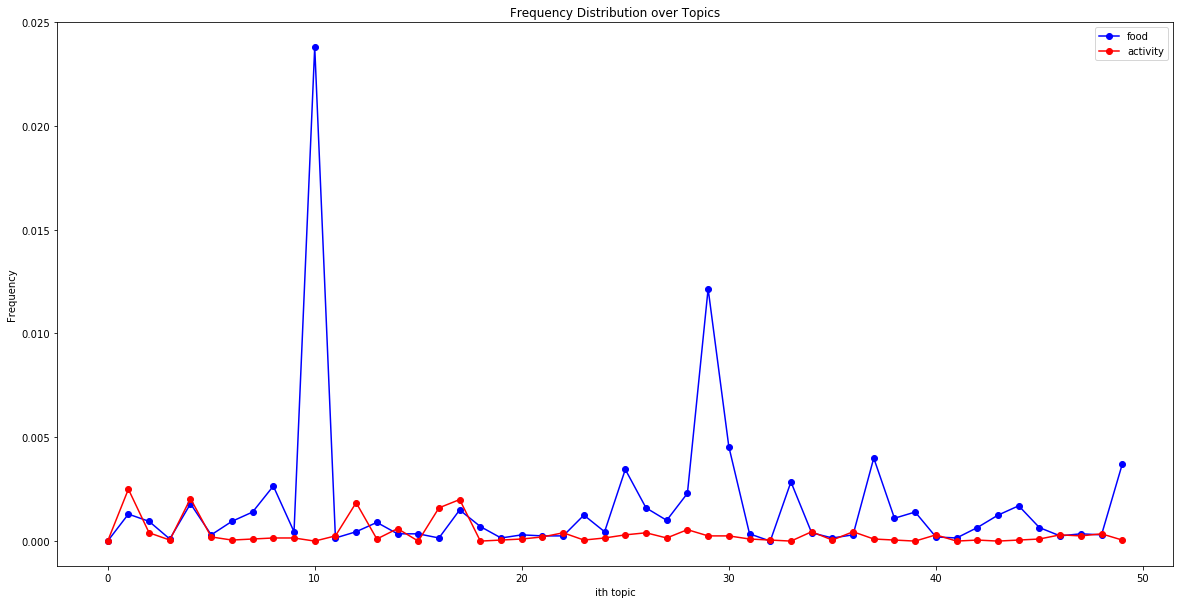

In [46]:
pvalue_distibution(LDA50_12000)

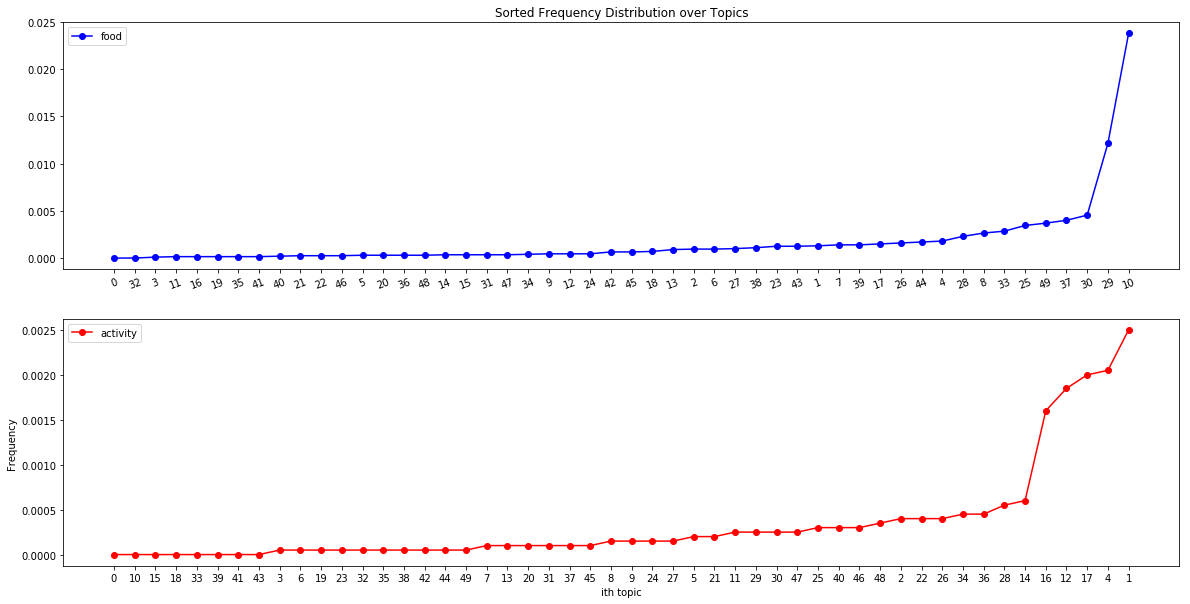

In [66]:
sorted_pvalue_distibution(LDA50_12000)

## topic 50, feature 16000

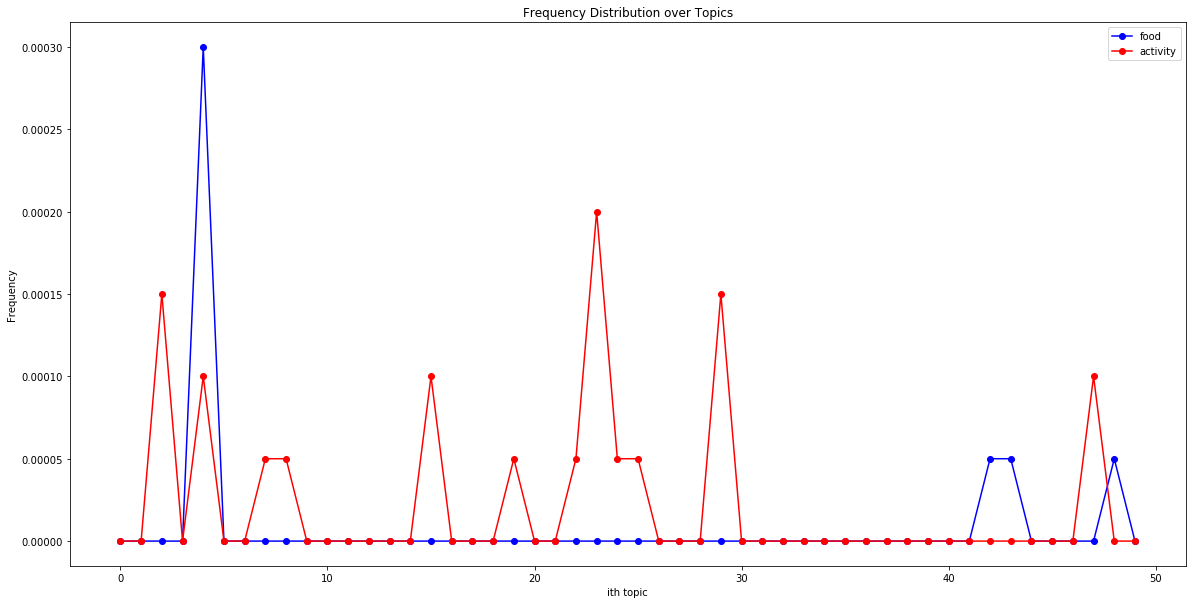

In [54]:
pvalue_distibution(LDA50_16000)

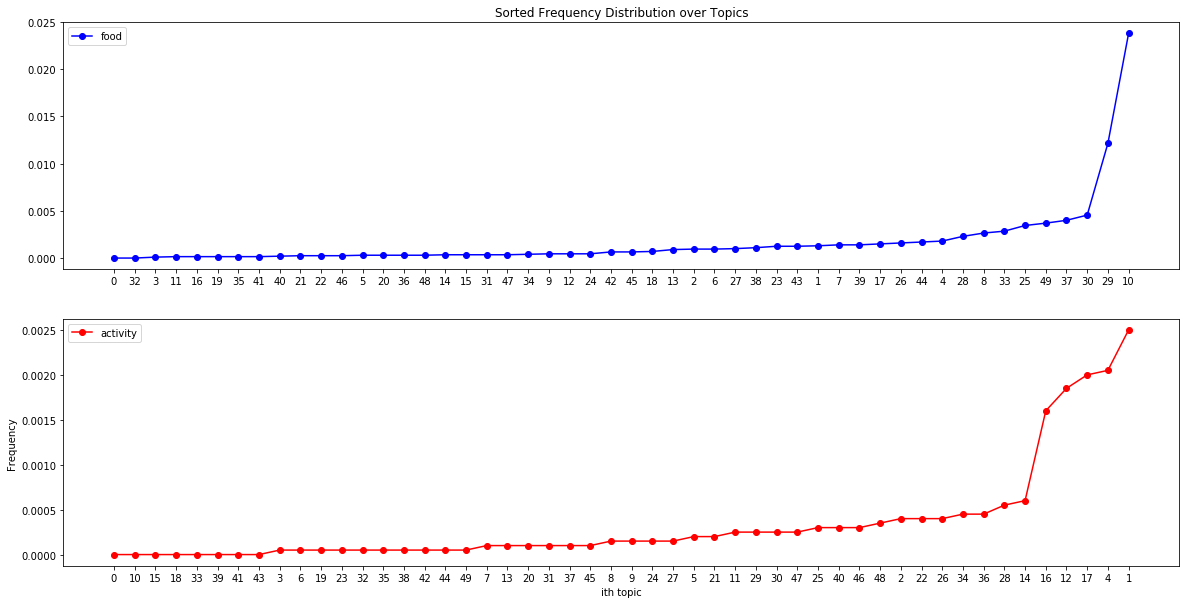

In [55]:
sorted_pvalue_distibution(LDA50_12000)

## topic 75, feature 12000

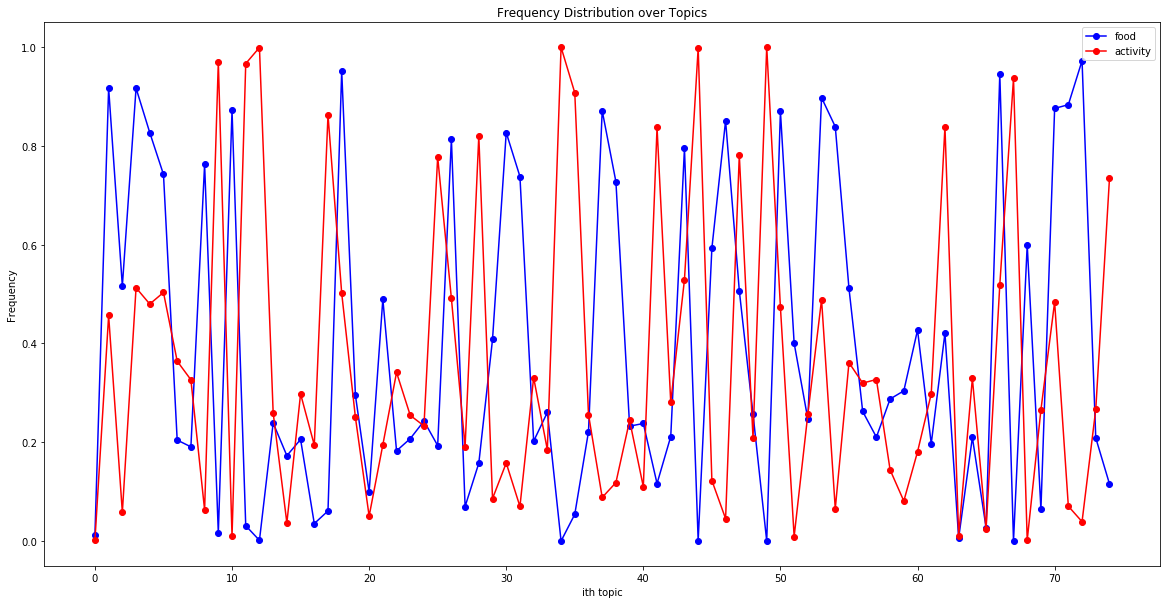

In [56]:
pvalue_distibution(LDA75_12000)

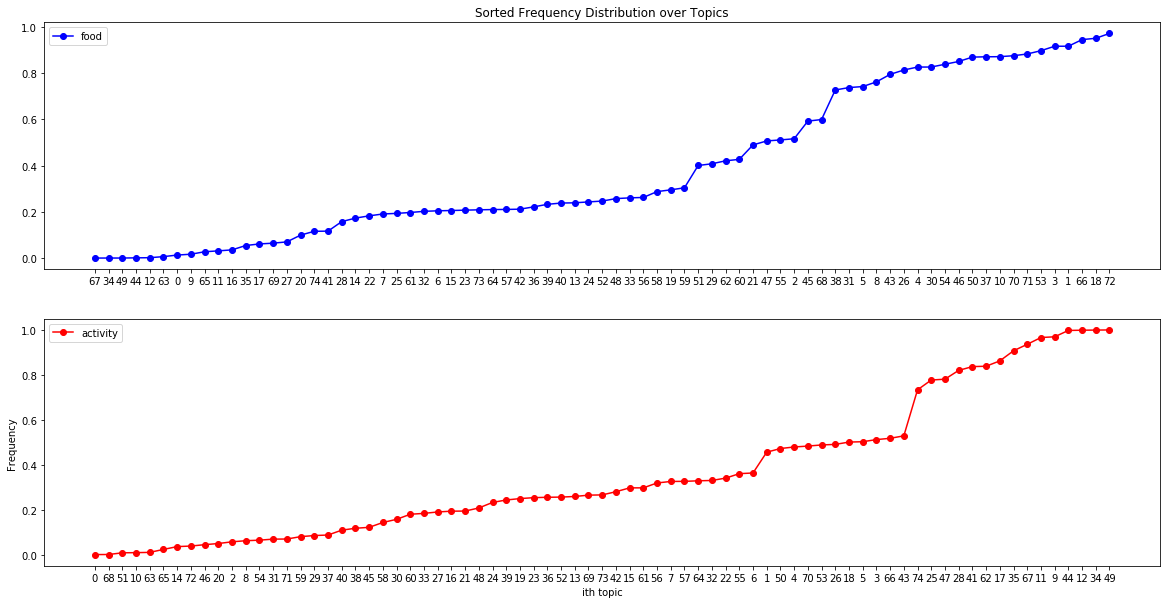

In [60]:
sorted_pvalue_distibution(LDA75_12000)

## topic 75, feature 16000

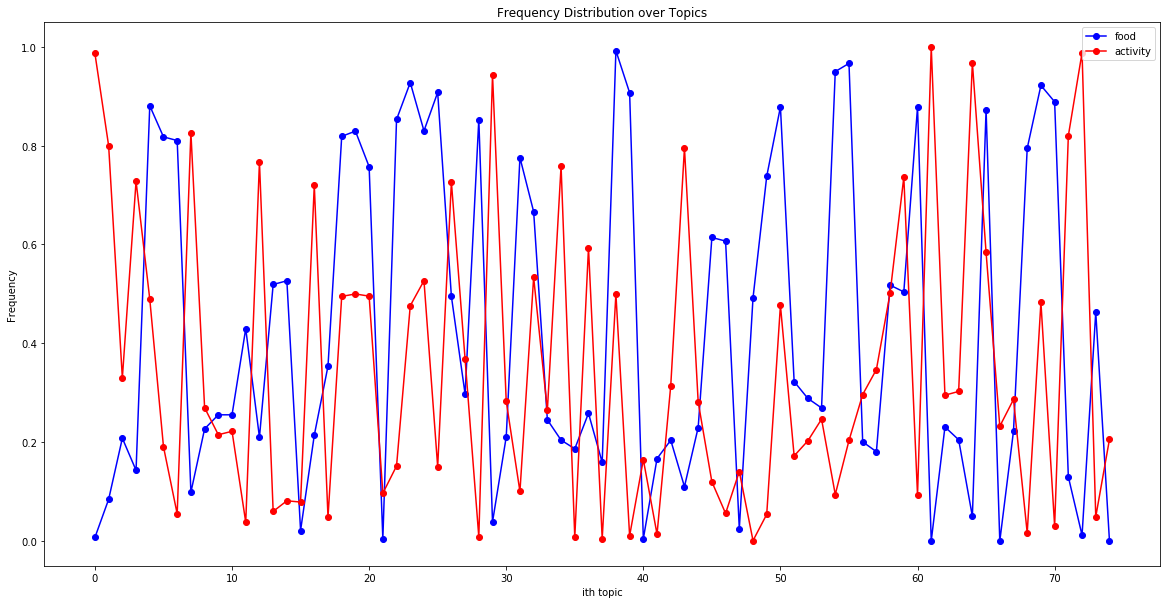

In [61]:
pvalue_distibution(LDA75_16000)

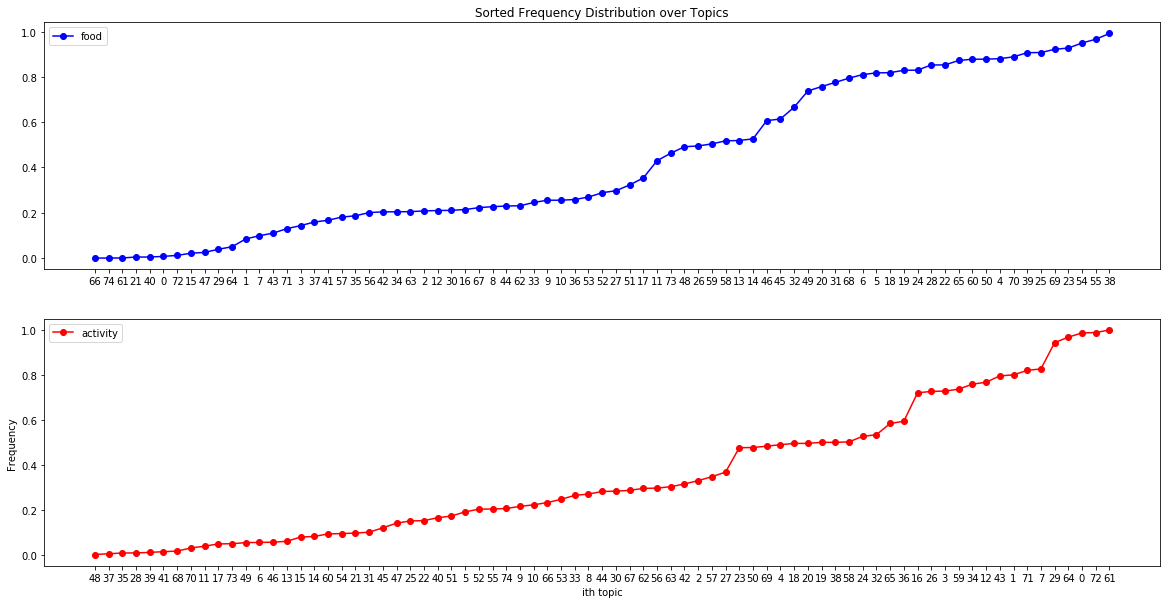

In [62]:
sorted_pvalue_distibution(LDA75_16000)

## topic 100, feature 12000

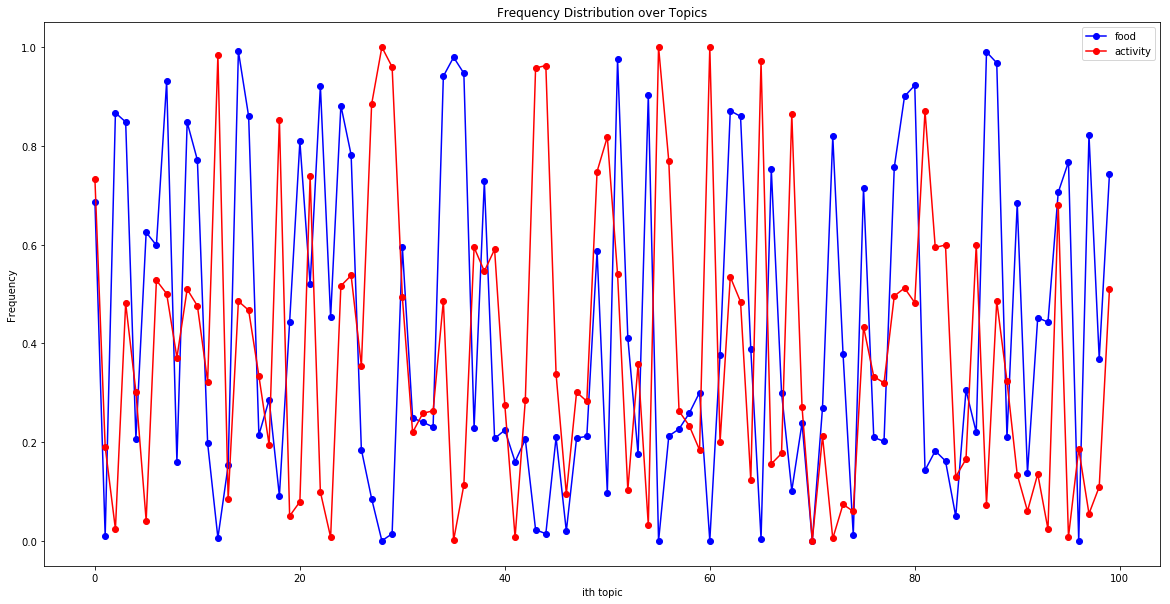

In [63]:
pvalue_distibution(LDA100_12000)

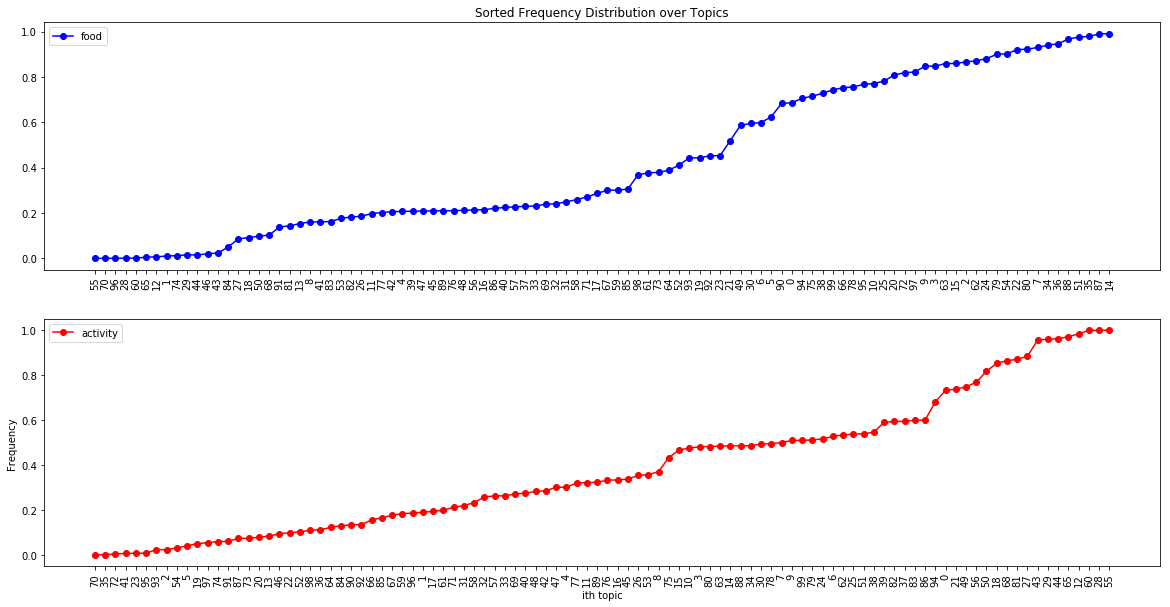

In [73]:
sorted_pvalue_distibution(LDA100_12000)

## topic 100, feature 16000

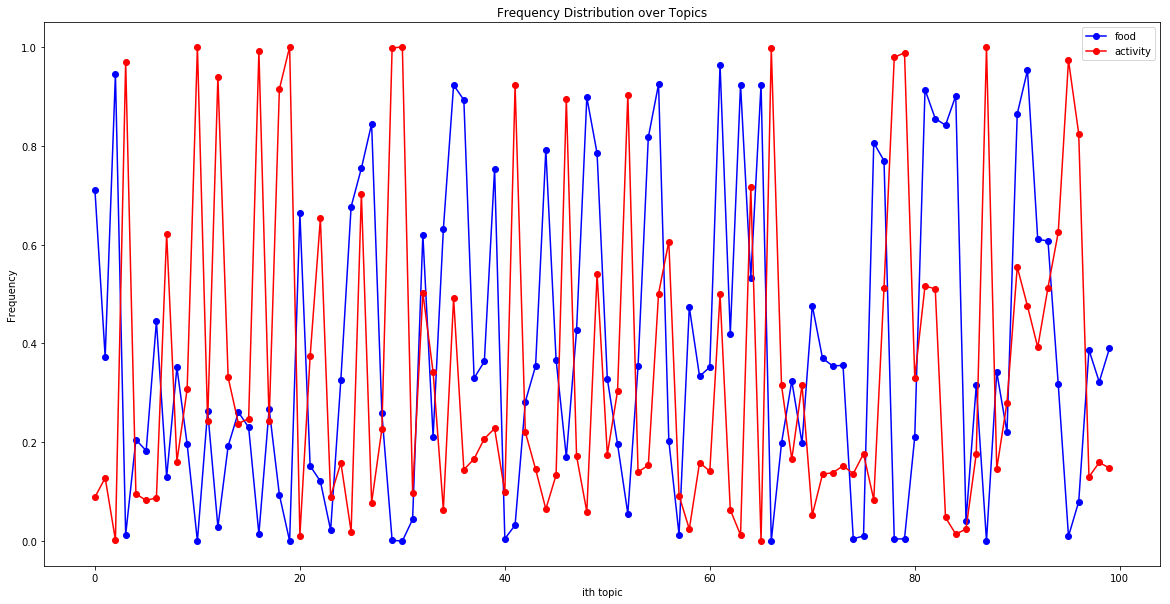

In [75]:
pvalue_distibution(LDA100_16000)

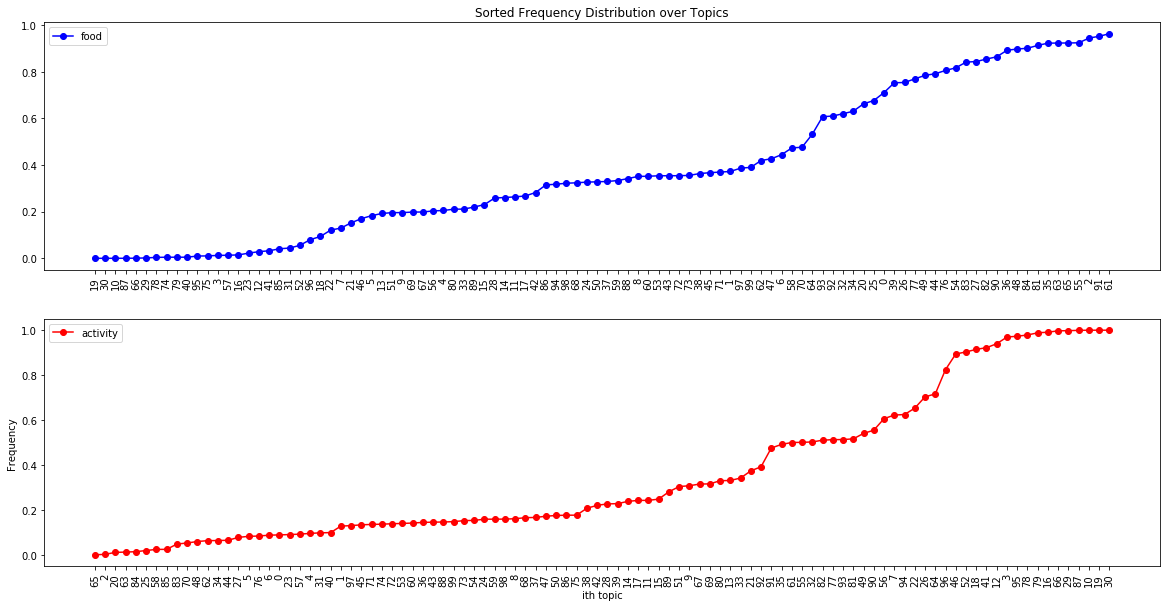

In [74]:
sorted_pvalue_distibution(LDA100_16000)

## topic 125, feature 20000

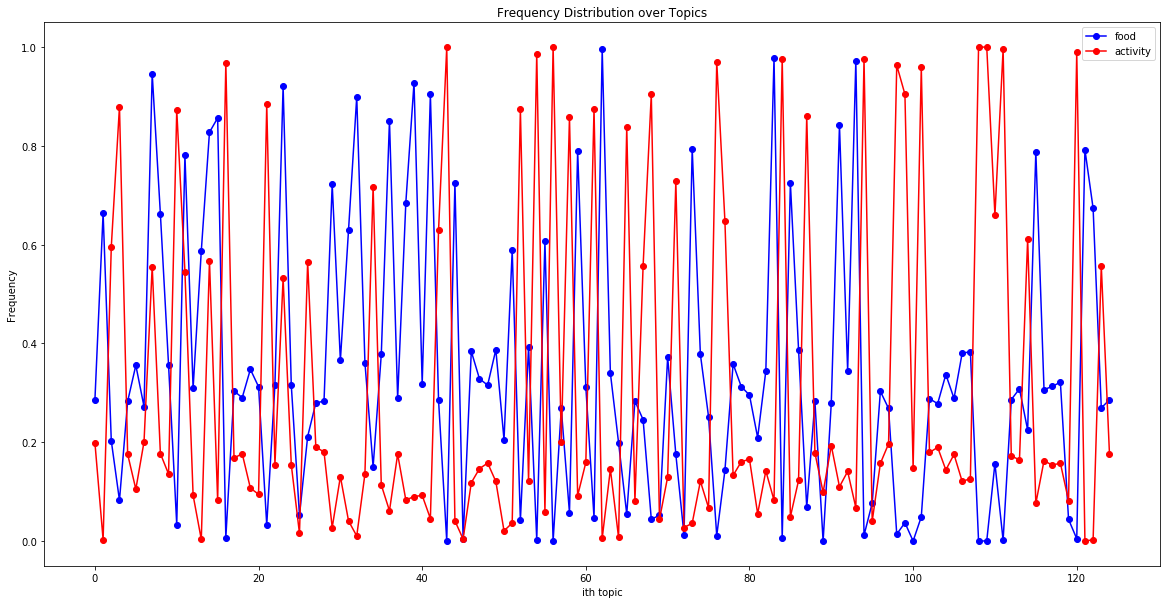

In [76]:
pvalue_distibution(LDA125_20000)

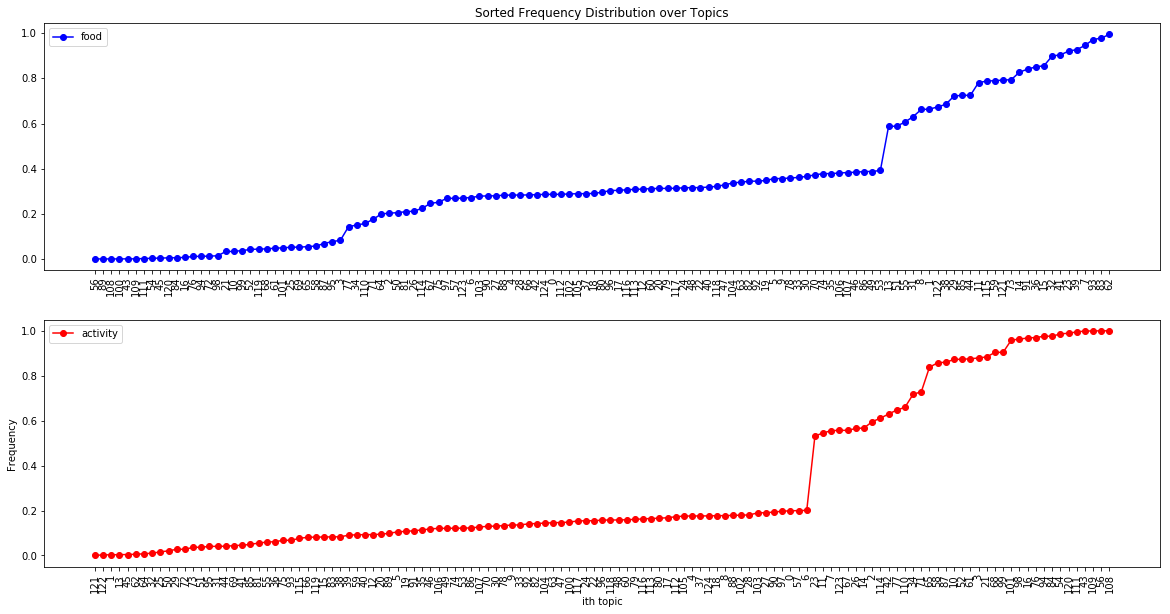

In [77]:
sorted_pvalue_distibution(LDA125_20000)

## topic 125, feature 25000

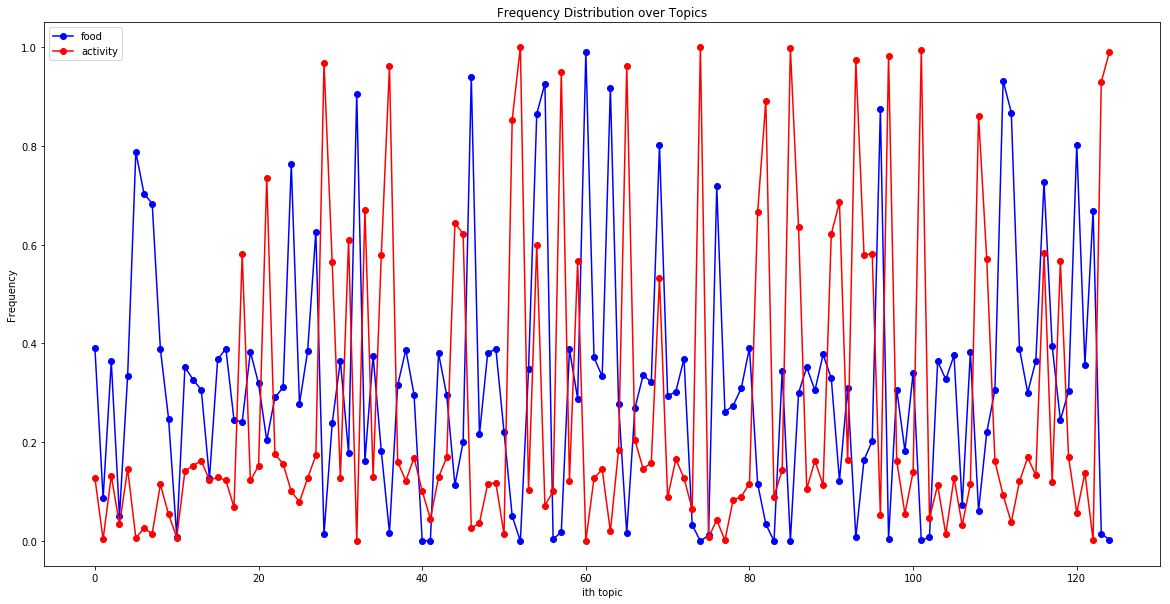

In [78]:
pvalue_distibution(LDA125_25000)

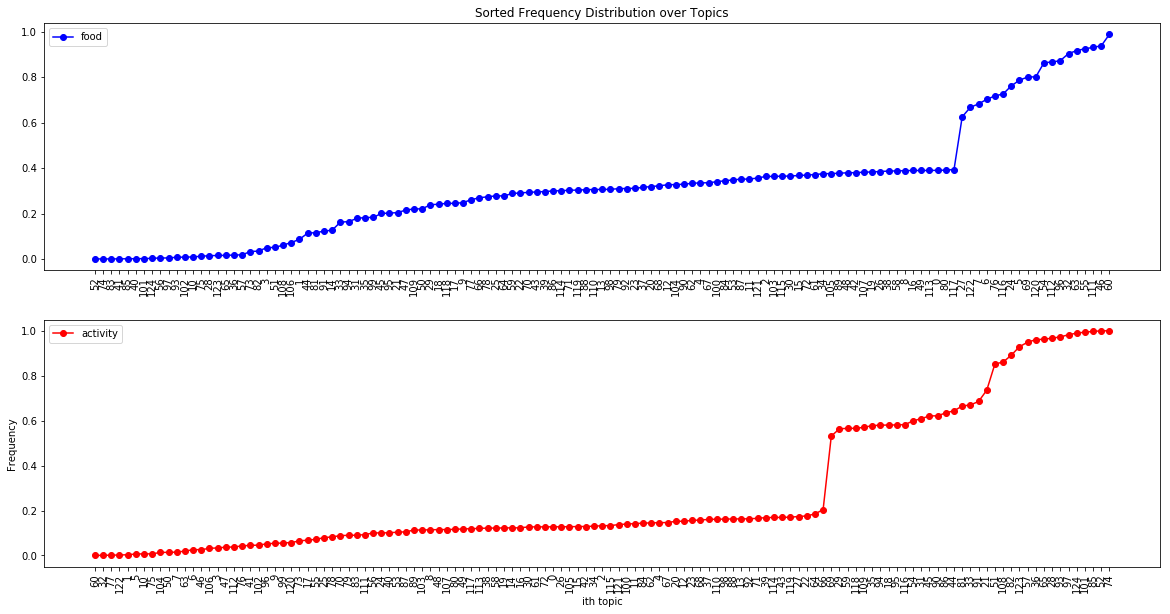

In [79]:
sorted_pvalue_distibution(LDA125_25000)